In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
wyniki = pd.read_csv("../dane/przetworzone/sumy_laureaty_2014_znorm.csv", low_memory=False)

In [3]:
szkoly = pd.read_csv("../dane/szkoly2014.csv")

In [4]:
df = wyniki.merge(szkoly, on="id_szkoly", how="left")

In [5]:
df.columns

Index(['Unnamed: 0', 'id_szkoly', 'plec', 'rocznik', 'dysleksja',
       'biologia_laureat', 'biologia_podstawowa', 'biologia_rozszerzona',
       'chemia_laureat', 'chemia_podstawowa', 'chemia_rozszerzona',
       'fizyka_laureat', 'fizyka_podstawowa', 'fizyka_rozszerzona',
       'geografia_laureat', 'geografia_rozszerzona', 'geografia_podstawowa',
       'historia_laureat', 'historia_podstawowa', 'historia_rozszerzona',
       'informatyka_laureat', 'informatyka_rozszerzona', 'j_angielski_laureat',
       'j_angielski_rozszerzona', 'j_polski_laureat', 'j_polski_rozszerzona',
       'matematyka_laureat', 'matematyka_rozszerzona', 'WOS_laureat',
       'WOS_rozszerzona', 'informatyka_podstawowa', 'j_angielski_podstawowa',
       'j_polski_podstawowa', 'matematyka_podstawowa', 'WOS_podstawowa',
       'typ_szkoly', 'publiczna', 'dla_doroslych', 'specjalna',
       'przyszpitalna', 'artystyczna', 'rok', 'id_szkoly_oke', 'nazwa_szkoly',
       'adres', 'miejscowosc', 'pna', 'poczta', 'wi

In [16]:
df["wielkosc_miejscowosci_log10"] = np.log10(df["wielkosc_miejscowosci"] + 1000)

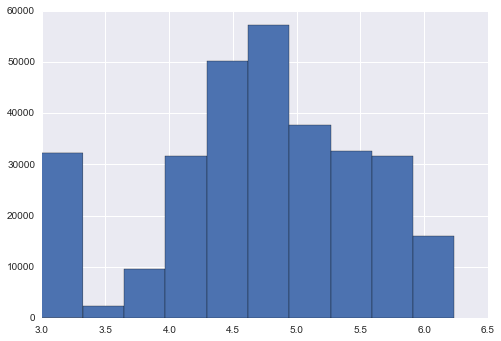

In [17]:
df["wielkosc_miejscowosci_log10"].hist()

In [20]:
def wiek_uprosc(wiek):
    if wiek <= 18:
        return "18m"
    elif wiek == 19:
        return "19"
    elif wiek == 20:
        return "20"
    else:
        return "21p"
    
df['wiek_prosciej'] = (2014 - df.rocznik).apply(wiek_uprosc)

In [26]:
formula = """j_polski_podstawowa ~ C(plec) + C(typ_szkoly) + C(rodzaj_gminy)
             + wielkosc_miejscowosci_log10 + C(wiek_prosciej) + publiczna + dla_doroslych"""
reg = smf.ols(formula, data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     j_polski_podstawowa   R-squared:                       0.182
Model:                             OLS   Adj. R-squared:                  0.182
Method:                  Least Squares   F-statistic:                     4760.
Date:                 Sat, 18 Jul 2015   Prob (F-statistic):               0.00
Time:                         22:54:39   Log-Likelihood:            -3.9462e+05
No. Observations:               300216   AIC:                         7.893e+05
Df Residuals:                   300201   BIC:                         7.894e+05
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                             -0.3049      0.030    -10.180      0.000        -0.364    -0.246
C(plec)[T.m]                          -0.1615      0.003    -47.726      0.000        -0.168    -0.155
C(typ_szkoly)[T.LOU]                  -0.1794      0.032     -5.619      0.000        -0.242    -0.117
C(typ_szkoly)[T.LP]                   -0.7163      0.013    -55.595      0.000        -0.742    -0.691
C(typ_szkoly)[T.T]                    -0.1581      0.009    -18.228      0.000        -0.175    -0.141
C(typ_szkoly)[T.TU]                   -0.3915      0.025    -15.547      0.000        -0.441    -0.342
C(rodzaj_gminy)[T.miejska]             0.1299      0.009     15.221      0.000         0.113     0.147
C(rodzaj_gminy)[T.miejsko-wiejska]     0.1627      0.012     13.981      0.000         0.140     0.186
C(rodzaj_gminy)[T.wiejska]             0.0573      0.015      3.713      0.000         0.027     0.088
C(wiek_prosciej)[T.19]                -0.3429      0.019    -18.175      0.000        -0.380    -0.306
C(wiek_prosciej)[T.20]                -0.8078      0.021    -39.405      0.000        -0.848    -0.768
C(wiek_prosciej)[T.21p]               -1.0960      0.021    -51.501      0.000        -1.138    -1.054
publiczna[T.True]                      0.2352      0.008     30.223      0.000         0.220     0.250
dla_doroslych[T.True]                 -0.2992      0.012    -24.991      0.000        -0.323    -0.276
wielkosc_miejscowosci_log10            0.1439      0.003     43.376      0.000         0.137     0.150
==============================================================================
Omnibus:                      224.999   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.497
Skew:                           0.067   Prob(JB):                     1.08e-49
Kurtosis:                       2.998   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

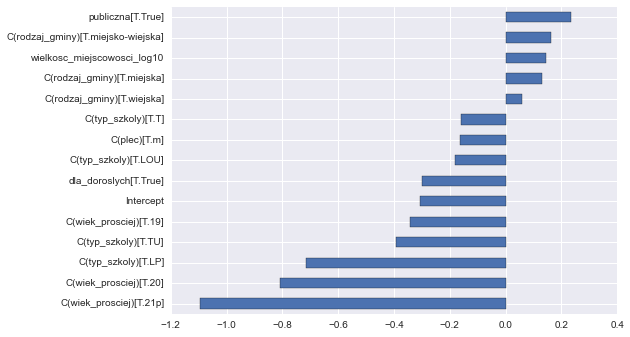

In [29]:
reg.params.order().plot(kind="barh")

In [25]:
formula = """matematyka_podstawowa ~ C(plec) + C(typ_szkoly) + C(rodzaj_gminy)
             + wielkosc_miejscowosci_log10 + C(wiek_prosciej) + publiczna + dla_doroslych
             + specjalna"""
reg = smf.ols(formula, data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     matematyka_podstawowa   R-squared:                       0.286
Model:                               OLS   Adj. R-squared:                  0.286
Method:                    Least Squares   F-statistic:                     8508.
Date:                   Sat, 18 Jul 2015   Prob (F-statistic):               0.00
Time:                           18:46:31   Log-Likelihood:            -3.6832e+05
No. Observations:                 297366   AIC:                         7.367e+05
Df Residuals:                     297351   BIC:                         7.368e+05
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0947      0.028     -3.394      0.001        -0.149    -0.040
C(plec)[T.m]                           0.2017      0.003     63.995      0.000         0.195     0.208
C(typ_szkoly)[T.LOU]               -1.341e-16   1.25e-16     -1.070      0.285      -3.8e-16  1.12e-16
C(typ_szkoly)[T.LP]                   -0.8807      0.012    -72.953      0.000        -0.904    -0.857
C(typ_szkoly)[T.T]                    -0.1211      0.008    -15.008      0.000        -0.137    -0.105
C(typ_szkoly)[T.TU]                   -0.2745      0.081     -3.369      0.001        -0.434    -0.115
C(rodzaj_gminy)[T.miejska]            -0.0012      0.008     -0.153      0.878        -0.017     0.014
C(rodzaj_gminy)[T.miejsko-wiejska]    -0.0067      0.011     -0.618      0.536        -0.028     0.015
C(rodzaj_gminy)[T.wiejska]            -0.1641      0.014    -11.404      0.000        -0.192    -0.136
C(wiek_prosciej)[T.19]                -0.4505      0.018    -25.725      0.000        -0.485    -0.416
C(wiek_prosciej)[T.20]                -1.1762      0.019    -61.791      0.000        -1.214    -1.139
C(wiek_prosciej)[T.21p]               -1.5774      0.020    -79.775      0.000        -1.616    -1.539
publiczna[T.True]                      0.2570      0.007     34.813      0.000         0.243     0.272
dla_doroslych[T.True]                 -0.3891      0.011    -34.758      0.000        -0.411    -0.367
specjalna[T.True]                     -0.2785      0.051     -5.513      0.000        -0.378    -0.179
wielkosc_miejscowosci_log10            0.1359      0.003     44.025      0.000         0.130     0.142
==============================================================================
Omnibus:                      631.810   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.950
Skew:                          -0.056   Prob(JB):                    5.70e-161
Kurtosis:                       3.216   Cond. No.                     6.87e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""